Задача классификации похожа на задачу регрессии, разница состоит во множестве ответов:

В случае регресии: $y\in \mathbb{R}$

В случае классификации: можно взять, например, $y \in \{x_1, x_2, \ldots, x_n \}$, где $x_i \in \mathbb{N}$ $\forall i = \overline{1,n}$, то есть это случай конечного множества ответов.


Частный случай задачи классификации - бинарная классификация. В этом случае $y=\mathbb{B}=\{0,1\}$.




Встает вопрос: как решать задачу классификации?

Можно попробовать решить задачу методом линейной регрессии:

In [575]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

Зададим следующюю обучающую выборку:

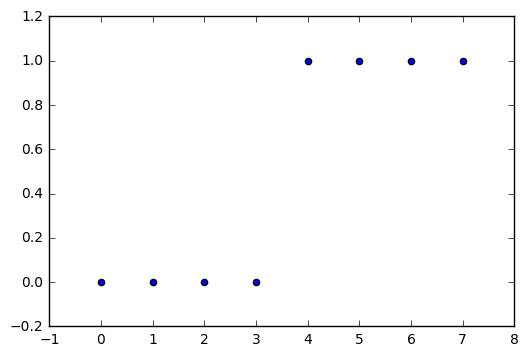

In [392]:
x = np.arange(0,8).reshape(8, 1)
y = [0,0,0,0,1,1,1,1]
plt.scatter(x, y)
plt.show()

Обучаем модель:

In [393]:
clf = LinearRegression()
clf.fit(x, y)
y_pred = clf.predict(x)

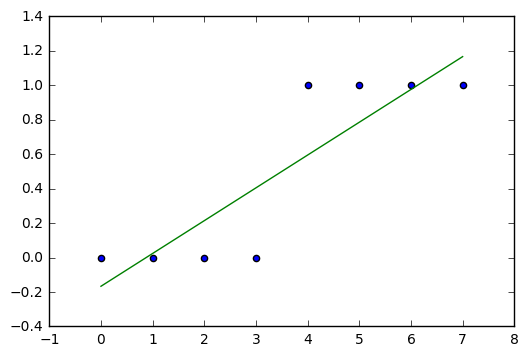

In [394]:
plt.scatter(x, y)
pred_arr = []
plt.plot(x, y_pred, color='green')
plt.show()

В данном случае, используя округление можно отности полученный ответ к одному из двух классов:

$h_{\theta}(x) < 0.5 \Rightarrow y = 0$

$h_{\theta}(x) \geq 0.5 \Rightarrow y = 1$

Добавим еще примеры к модели:

16 16


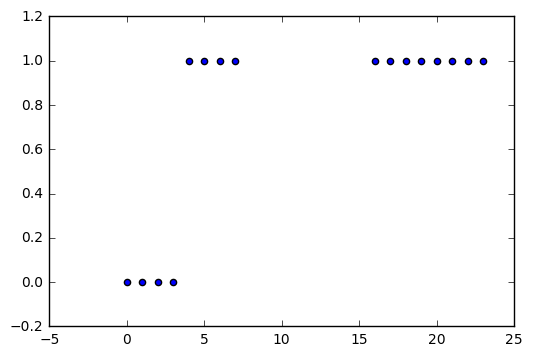

In [402]:
x_1 = np.array(np.arange(8).tolist() + np.arange(16,24).tolist())
x_1 = x_1.reshape(len(x_1), 1)
y_1 = [0,0,0,0] + [1]*(len(x_1)-4)
print(len(x_1),len(y_1))
plt.scatter(x_1, y_1)
plt.show()

Обучим:

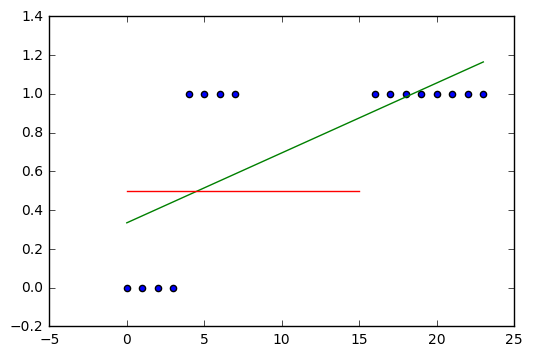

In [403]:
clf1 = LinearRegression()
clf1.fit(x_1, y_1)
y_pred = clf1.predict(x_1)
plt.scatter(x_1, y_1)
pred_arr = []
plt.plot(x_1, y_pred, color='green')
plt.plot(np.arange(len(x_1)), [0.5]*len(x_1), color='red')
plt.show()


Посмотрим, какой результат получится в точке $x = 4$

In [404]:
print(clf1.predict([[4]]))

[ 0.47924188]


То есть $h_{\theta}(x) = 0.48 < 0.5 \Rightarrow y = 0$.

Потому сводить задачу классификации к задаче линейной регрессии не стоит.

Поскольку $y \in \{0, 1\}$, то хотелось бы ввести ограничение на $0 \leq h_{\theta}(x) \leq 1$.

## Гипотеза

В линейной регресии гипотеза имеет вид:

$h_{\theta}(x) = \theta \cdot x = \theta_0 \cdot x_0 + \theta_1 \cdot x_1 + \ldots + \theta_n \cdot x_n$

Для логистической регрессии введем гипотезу:
    
$h_{\theta}(x) = g(\theta \cdot x)$, где $g(x) = \frac{1}{1+e^{-x}}$, то есть

**$h_{\theta}(x) = \frac{1}{1+e^{-\theta x}}$**

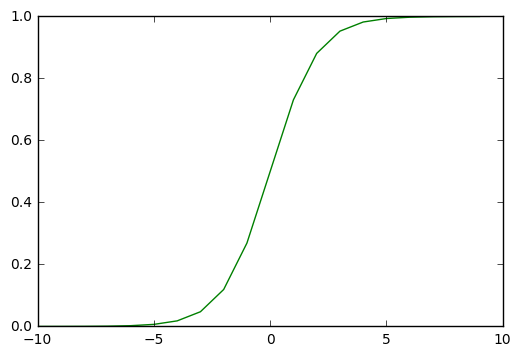

In [415]:
from scipy.stats import logistic
X_cdf = np.arange(-10, 10, 1)
Y_cdf = [logistic.cdf(x) for x in X_cdf]
plt.plot(X_cdf, Y_cdf, color='green')
plt.show()

Функция $g$ называется "Sigmoid function" или сигмоида.

Как трактовать такую гипотезу? Результат гипотезу показывает вероятность того, что вектор $x$ выдаст ответ $1$, то есть:

$h_{\theta}(x) = \mathbb{P}(y = 1| x; \theta)$, 
где 

$\mathbb{P}(y = 1| x; \theta) + \mathbb{P}(y = 0| x; \theta) = 1$

**Замечание:**

$h_{\theta}(x) \leq 0.5 \Leftrightarrow (\theta \cdot x) \geq 0$.

Пусть $\theta = [-1, 0, 2]$, $x = [1, x_1, x_2]^{T}$. Тогда 

$h_{\theta}(x) \leq 0.5 \Leftrightarrow -1 + 2x_2 \geq 0 \Leftrightarrow x_2 \geq \frac{1}{2}$


## COST FUNCTION (функция потерь, стоимости)

Когда происходит обучение, необходимо добиться того, чтобы функция-гипотеза $h_{\theta}(x)$ как можно лучше описывала зависимость наших данных. Для этого надо подобрать некоторую функцию, которая была бы критерием того, насколько хорошо выбранная гипотеза это делает.

В случае линейной регрессии, такая функция имеет вид:
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \frac{1}{2}(h_{\theta}(x_i) - y_i)^{2},$$
при этом $$Cost(h_{\theta}(x), y) = \frac{1}{2}(h_{\theta}(x) - y)^{2},$$
то есть $$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} Cost(h_{\theta}(x_i), y_i)$$

Таким образом, происходит переход к задаче, нахождения, такого вектора $\theta$, на котором функция стоимости принимает минимальное значение. Иначе говоря, найти решение
$$\min_{\theta}J(\theta).$$

Рассмотрим пример:



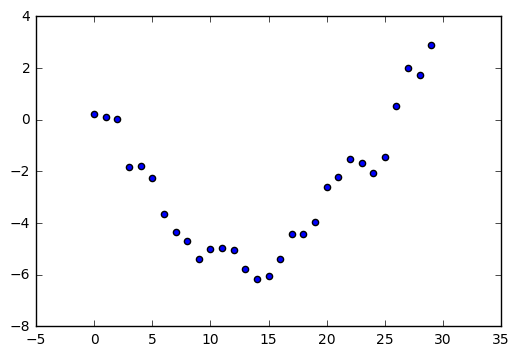

In [416]:
num_data_points = 30

y = np.random.randn(num_data_points, 1)
y = np.cumsum(y).reshape(num_data_points, 1)
x = np.arange(num_data_points, dtype='float32').reshape(num_data_points, 1)

plt.scatter(x, y)
plt.show()

Задавая параметры $\theta$ будем менять гипотезу. В данном случае достаточно задать $\theta = [\theta_0, \theta_1]$

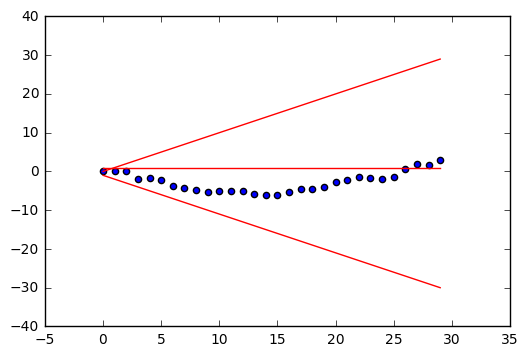

In [426]:
X = np.arange(0,30,1)
theta = [[1, 0], [0, 1], [-1, -1]]
h = [[th[0] + x*th[1] for x in X] for th in theta]
# h1 = [theta1[0] + X[i] for  i in X]
plt.scatter(x, y)
for hyp in h:
    plt.plot(X, hyp, color='red')
plt.show()

Теперь зафиксируем $\theta_0 = 0$ и посмотрим, как будет меняться $J(\theta)$ в зависимости от $\theta_{1}$

40 40


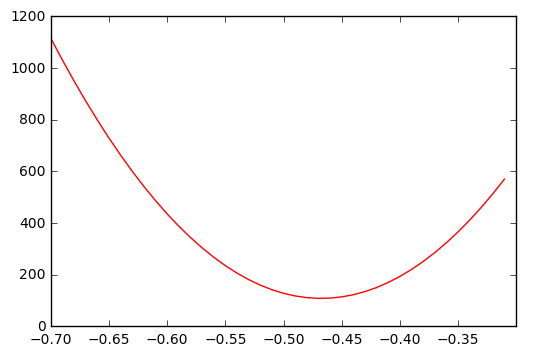

In [430]:
# theta = [[0, i] for i in range(-3, 3, 1)]
theta1 = np.arange(-0.7, -0.3, 0.01)
h = [[x*th for x in X] for th in theta1]
# Вычислим J(theta1)
J = [ sum([(hyp[i]-y[i])**2 for i in range(len(y_1))]) / 2*len(y) for hyp in h]
plt.plot(theta1, J, color='red')
plt.show()

Таким образом, в случае линейной регрессии, получаем гладкую функцию.

Теперь рассмотрим, эту же зависимость в случае бинарной классификации:

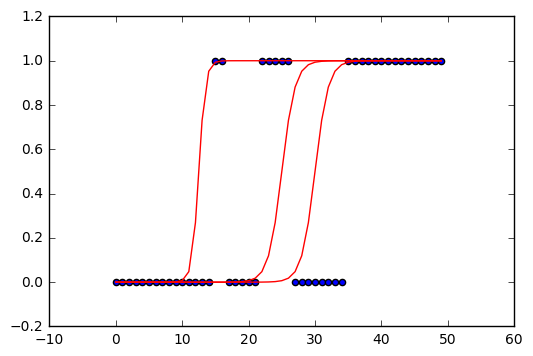

In [522]:
theta = [[-25, 1], [-30, 1], [-25, 2]]
x_bin = np.arange(50)
y_bin = np.random.randint(0, 2, 50)
y_bin = [0]*15 + [1]*2 + [0]*5 + [1]*5 + [0]*8 + [1]*15
h = [[logistic.cdf(th[0] + x*th[1]) for x in x_bin] for th in theta]
plt.scatter(x_bin, y_bin)
for hyp in h:
    plt.plot(x_bin, hyp, color='red')
plt.show()

isConvex (on blue points): False
isConvex: False


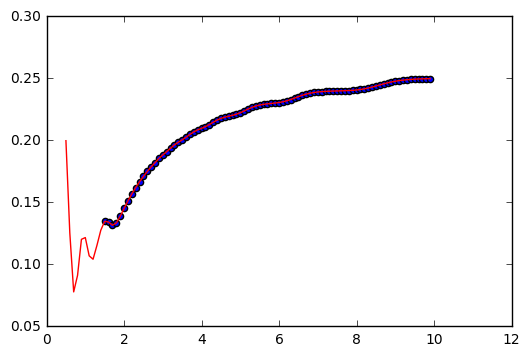

In [688]:
theta = np.arange(.5, 10, .1)
J = []
for th in theta:
    cost_sum = []
    for i in range(len(y_bin)):
        cost_sum.append((logistic.cdf(-25 + x_bin[i]*th) - y_bin[i])**2)
    J += [sum(cost_sum)/(2 * len(y_bin))]
    
print('isConvex (on blue points):', (np.diff(J) > 0).all())
# НУ ПОЧЕМУ ОНА ГЛАДКАЯ !!!!!
# 
plt.plot(theta, J, color='red')
theta = np.arange(1.5, 10, .1)
J = []
for th in theta:
    cost_sum = []
    for i in range(len(y_bin)):
        cost_sum.append((logistic.cdf(-25 + x_bin[i]*th) - y_bin[i])**2)
    J += [sum(cost_sum)/(2 * len(y_bin))]
    
print('isConvex:', (np.diff(J) > 0).all())
# НУ ПОЧЕМУ ОНА ГЛАДКАЯ !!!!!
# Нашел несколько экстремумов, нужно было просто взять отрезки ближе к глобальному минимуму.

plt.scatter(theta, J)
plt.show()

Видно, что в зависимости функции ошибки от параметров $\theta$, есть не меньше 2 локальных + глобальный экстремум.
Получаем функцию, в которой много локальных точек экстремума, что мешает нахождению "наилучших" параметров $\theta$ методом градиентного спуска.

Вместо квадратичной ошибки, в логистической регрессии, функция Cost задается по следующему правилу:
$$ Cost(h_{\theta}(x), y) = \begin{cases} 
    y = 0 \Rightarrow -\log(h_{\theta}(x)) \\
    y = 1 \Rightarrow -\log(1-h_{\theta}(x))
\end{cases}$$

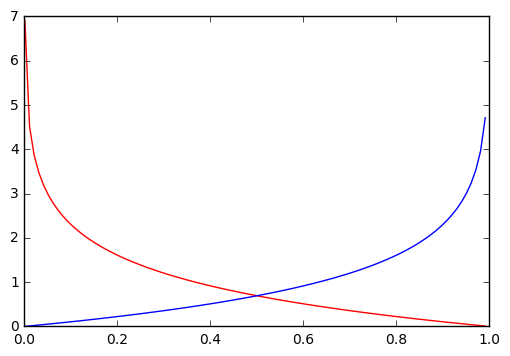

In [518]:
import math
X_log = np.arange(0.001,1,0.01)
Y_log = [-(math.log(x)) for x in X_log]
Y_log_rev = [-(math.log(1-x)) for x in X_log]
plt.plot(X_log, Y_log, color='red')
plt.plot(X_log, Y_log_rev, color='blue')
plt.show()


Перепишем $Cost$ в виде выражения:

$$Cost(h_{\theta}(x), y) = -y\cdot \log(h_{\theta}(x)) - (1-y)\cdot \log(1-h_{\theta}(x)).$$

Тогда функция $J(\theta)$ примет вид:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}[y^{(i)}\cdot \log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\cdot \log(1-h_{\theta}(x^{(i)}))]$$

Можно заметить, что такое задание функции $Cost$, выдает все более большой штраф при неправильном ответе, то есть штраф возрастает не линейно.

## Случай множественной классификации (One vs all)

Рассмотрим теперь случай $y \in \{0, 1, 2, \ldots, n\}$, где $n > 1$. 
Чтобы решить такую задачу, ее можно светси к $n + 1$ задаче бинарной классификации.

На каждой задаче мы предсказываем вероятность того, что ответ удовлетворяет условию принадлежности классу, иначе говоря:

$$h^{0}_{\theta}(x) = \mathbb{P} ( y = 0|x; \theta)$$
$$h^{1}_{\theta}(x) = \mathbb{P} ( y = 1|x; \theta)$$
$$\ldots $$
$$h^{n}_{\theta}(x) = \mathbb{P} ( y = n|x; \theta)$$

Получив вероятности принадлежности к каждому классу относительно всех остальных классов, конечным результатом будет класс с наибольшей вероятностью:

$$\max_{i} (h^{i}_{\theta}(x))$$

[1 2 1 1 1 2 2 2 2 2 2]
Коэффициенты обучения на красных точках: theta= [[ 0.18025549  0.37204408]] intercept = [-1.26252746]
[1 2 2 2 2 1 1 1 2 2 2]
Коэффициенты обучения на зеленых точках: theta= [[-0.46927774  0.11913554]] intercept = [ 1.17751948]
[2 1 2 2 2 2 2 2 1 1 1]
Коэффициенты обучения на синих точках: theta= [[ 0.62872036 -0.34156186]] intercept = [ 1.10326429]


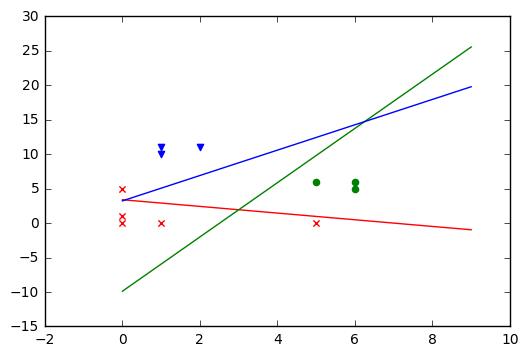

In [661]:
p1 = np.array([[5,0],[0,5],[1,0],[0,1],[0,0]])
p2 = np.array([[6,5],[6,6],[5,6]])
p3 = np.array([[1,10],[1,11],[2,11]])

y1 = [1,1,1,1,1,2,2,2,2,2,2]
y2 = [2,2,2,2,2,1,1,1,2,2,2]
y3 = [2,2,2,2,2,2,2,2,1,1,1]
P = np.vstack((p1,p2,p3))
clf = LogisticRegression()


plt.scatter(p1[:, 0], p1[:, 1], marker="x", color='red')
plt.scatter(p2[:, 0], p2[:, 1], marker="o", color='green')
plt.scatter(p3[:, 0], p3[:, 1], marker="v", color='blue')

def calc_points(coef, intercept):
    coef = coef[0]
    x_coef = np.arange(0,10)
    y_coef = [((-coef[0]*x) - intercept ) /(coef[1]) for x in x_coef ]
    return x_coef, y_coef

clf.fit(P, y1)
print(clf.predict(P))
print ('Коэффициенты обучения на красных точках: theta=', clf.coef_, 'intercept =', clf.intercept_)
ps =  calc_points(clf.coef_, clf.intercept_)
plt.plot(ps[0], ps[1], color='red')

clf.fit(P, y2)
print(clf.predict(P))
print ('Коэффициенты обучения на зеленых точках: theta=', clf.coef_, 'intercept =', clf.intercept_)
ps =  calc_points(clf.coef_, clf.intercept_)
plt.plot(ps[0], ps[1], color='green')

clf.fit(P, y3)
print(clf.predict(P))
print ('Коэффициенты обучения на синих точках: theta=', clf.coef_, 'intercept =', clf.intercept_)
ps =  calc_points(clf.coef_, clf.intercept_)
plt.plot(ps[0], ps[1], color='blue')
plt.show()



Видно, что точка [5,0] попадает в 2 класса сразу. Необходимо вычислить вероятность принадлежности каждому классу:

In [678]:
test_point = np.array([[5, 0]])
clf.fit(P, y1)
print(clf.predict_proba(test_point)[0][0])
clf.fit(P, y2)
print(clf.predict_proba(test_point)[0][0])
clf.fit(P, y3)
print(clf.predict_proba(test_point)[0][0])

0.58934299654
0.762940556836
0.0141071475691


Таким образом, точка [5,0] будет отнесена ко второму классу (зеленому). Это также можно увидеть из рисунка, точка [5,0] находится значительно глубоко внутри зеленый зоны, в то время как в красной зоне она лежит почти на граничной линии. То есть, чем ближе точка к граничной линии, тем меньше вероятность, что она принадлежит этому классу.